# Lead Scoring Case Study

Batch : DS C48
Contributors:
•	Vidhi Surana
•	Shubham

# Problem Statement

Main Problem to be solved is to improve the Lead Conversion Rate of the education company called X Education that sells online courses to industry professionals
On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead or a potential customer. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
 
 Lead Conversion Rate  -> Out of total number of leads, how many convert into potential customers.


lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

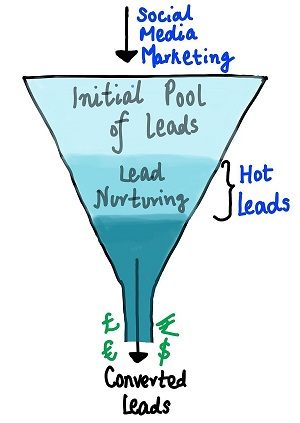

What is our job?

1. X Education has appointed you to help them select the most promising leads(hot leads), i.e. the leads that are most likely to convert into paying customers. 
2. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data provided

-- You have been provided with a leads dataset from the past with around 9000 data points.
-- This dataset consists of various attributes such as lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not.
-- The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

# Approach used

We will be using the following approach for this problem:

1. The Machine Learning algorithm will work at the level between the Initial Pool of Leads and Leads Nurturing. 
2. The filter of ML Model provides the Binary Classification Model predicting which leads have high chances of converting into lead(1 or 0)
3. Rather than passing all the potential customers to the sales team, only the ones that are filtered are passed.
4. With the help of Ml, LCR will increase and Sales team will not reach out to people having lesser chances of Converting into a lead.

Goal : Build a Logistic Regression Model which will assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. Target lead conversion rate to be around 80%.

In [1228]:
#Import the required packages
import warnings
warnings.filterwarnings('ignore')

# numpy and pandas package

import numpy as np
import pandas as pd

# Packages for Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Section 1: Data Understanding

In [1229]:
#Importing dataset
lead_data = pd.read_csv("leads.csv")

In [1230]:
#Let's explore the top 5 rows
lead_data.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [1231]:
#Check the stats of the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Inspection

In [1232]:
#Check the shape of the dataset
lead_data.shape

(9240, 37)

In [1233]:
#Check the information of the dataframe example the columns data types and null/not null columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1234]:
lead_data.shape

(9240, 37)

In [1235]:
#Check the value counts of all the categorical variables before converting and after converting
# Lead Origin
lead_data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [1236]:
# Lead Source
lead_data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1237]:
# Many of the Lead Sources have very less rows, we will club those values which are having less rows for Lead Source 
# for better understandability (< 50)
lead_data["Lead Source"] = lead_data["Lead Source"].replace(["bing","google","Click2call","Press_Release",
                                                             "Social Media","Live Chat","youtubechannel","testone",
                                                             "Pay per Click Ads","welearnblog_Home","WeLearn","blog","NC_EDM"],"Others")

In [1238]:
lead_data["Lead Source"].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: Lead Source, dtype: int64

In [1239]:
#Do Not Email
lead_data["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [1240]:
#Do Not Call
lead_data["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [1241]:
# Converted
lead_data["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [1242]:
#Last Activity
lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1243]:
lead_data["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1244]:
lead_data["Last Activity"] = lead_data["Last Activity"].replace(["Had a Phone Conversation","Approached upfront","View in browser link Clicked",
                                                                 "View in browser link Clicked","Email Received","Email Marked Spam",
                                                                "Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

In [1245]:
lead_data["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

In [1246]:
#Country
lead_data["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1247]:
lead_data["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1248]:
#Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value
# When the clients forget to select from drop down it says 'Select' which can be treated as NULL
#As an exception, the Specialization if not selected, it could be because the client didnt do any specialization at all, so we should
#not consider that as NULL instead consider as 'NotSpecified'
lead_data["Specialization"]=lead_data["Specialization"].replace('Select','NotSpecified')

In [1249]:
lead_data["Specialization"].value_counts()

NotSpecified                         1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1250]:
#How did you hear about X Education
lead_data["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1251]:
lead_data["How did you hear about X Education"]=lead_data["How did you hear about X Education"].replace('Select',np.nan)

In [1252]:
lead_data["How did you hear about X Education"].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [1253]:
lead_data["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1254]:
lead_data["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1255]:
lead_data["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [1256]:
lead_data["Magazine"].value_counts()

No    9240
Name: Magazine, dtype: int64

In [1257]:
lead_data["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [1258]:
lead_data["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [1259]:
lead_data["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [1260]:
lead_data["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [1261]:
lead_data["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [1262]:
lead_data["Receive More Updates About Our Courses"].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [1263]:
lead_data["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1264]:
lead_data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1265]:
lead_data["Update me on Supply Chain Content"].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [1266]:
lead_data["Get updates on DM Content"].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [1267]:
lead_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1268]:
lead_data["Lead Profile"]=lead_data["Lead Profile"].replace('Select',np.nan)

In [1269]:
lead_data["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1270]:
lead_data["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1271]:
lead_data["City"]=lead_data["City"].replace('Select',np.nan)

In [1272]:
lead_data["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1273]:
lead_data["Asymmetrique Activity Index"].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [1274]:
lead_data["Asymmetrique Profile Index"].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [1275]:
lead_data["I agree to pay the amount through cheque"].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [1276]:
lead_data["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1277]:
lead_data["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1278]:
lead_data["Last Notable Activity"] = lead_data["Last Notable Activity"].replace(["Had a Phone Conversation","Email Marked Spam","Approached upfront",
                                                                                 "Resubscribed to emails","View in browser link Clicked","Form Submitted on Website",
                                                                                 "Email Received"],"Others")

In [1279]:
lead_data["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

## Section 2: Data Cleaning

In [1280]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1281]:
# Replacing the columns having Yes/No with Binary 1 and 0
lead_data["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [1282]:
lead_data["Do Not Email"] = lead_data["Do Not Email"].map({'Yes':1,'No':0})

In [1283]:
lead_data["Do Not Email"].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [1284]:
lead_data["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [1285]:
lead_data["Do Not Call"] = lead_data["Do Not Call"].map({'Yes':1,'No':0})

In [1286]:
lead_data["Do Not Call"].value_counts()

0    9238
1       2
Name: Do Not Call, dtype: int64

In [1287]:
lead_data["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1288]:
lead_data["A free copy of Mastering The Interview"] = lead_data["A free copy of Mastering The Interview"].map({'Yes':1,'No':0})

In [1289]:
lead_data["A free copy of Mastering The Interview"].value_counts()

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

# Section 2a: Handling Missing values

In [1290]:
#Calculate the percentage of the missing values for each column
100*lead_data.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Specialization                                   15.562771
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [1291]:
# Decide which columns to drop. If the missing values percentage is > 40%, add to the drop list

list_drop_col = list(lead_data.columns[100*lead_data.isnull().mean() > 40])
list_drop_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [1292]:
lead_data = lead_data.drop(list_drop_col,axis=1)

In [1293]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1294]:
#Drop the below columns from the lead_data dataframe because majority of their values is 'No' or the columns are not useful
# or they are highly skewed
#Country column is India as majority
#Tags is used by sales team for analysis
#Lead Number is not useful for analaysis
list_drop_col = ["Lead Number","What matters most to you in choosing a course","Receive More Updates About Our Courses",
                 "Update me on Supply Chain Content","Search","Magazine",
                 "Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations",
                 "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                 "Tags","A free copy of Mastering The Interview","Country"]
lead_data = lead_data.drop(list_drop_col,axis=1)

In [1295]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9204 non-null   object 
 3   Do Not Email                     9240 non-null   int64  
 4   Do Not Call                      9240 non-null   int64  
 5   Converted                        9240 non-null   int64  
 6   TotalVisits                      9103 non-null   float64
 7   Total Time Spent on Website      9240 non-null   int64  
 8   Page Views Per Visit             9103 non-null   float64
 9   Last Activity                    9137 non-null   object 
 10  Specialization                   7802 non-null   object 
 11  What is your current occupation  6550 non-null   object 
 12  City                

In [1296]:
#Calculate the percentage of the missing values for each column
100*lead_data.isnull().mean().sort_values(ascending=False)

City                               39.707792
What is your current occupation    29.112554
Specialization                     15.562771
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
Prospect ID                         0.000000
Lead Origin                         0.000000
Do Not Email                        0.000000
Do Not Call                         0.000000
Converted                           0.000000
Total Time Spent on Website         0.000000
Last Notable Activity               0.000000
dtype: float64

In [1297]:
#Imputation - replace missing values of other remaining columns with mean / mode

#Segregating the columns Categorical/Continuous
cat_cols_lead_data= ["Lead Origin","Lead Source","Do Not Email","Do Not Call","Last Activity","Specialization","What is your current occupation","City","Last Notable Activity"]
cont_cols_lead_data = ["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
id_cols_lead_data=["Prospect ID"]
len(set(cat_cols_lead_data))+len(set(cont_cols_lead_data))+len(set(id_cols_lead_data)) #using set to avoid duplicates
    

14

In [1298]:
#Missing values treatment for categorical variables..The missing values are replaced with Mode(most frequently occuring value)

for i in cat_cols_lead_data:
    mode_col = lead_data[i].mode()
    lead_data[i] = lead_data[i].fillna(mode_col[0])

In [1299]:
#Missing value treatment for Continuous columns..  The missing values for continuos values are replaced with median
for i in cont_cols_lead_data:
    med = lead_data[i].median()
    lead_data[i] = lead_data[i].fillna(med)

In [1300]:
#Check the percentage of the missing values for each column
100*lead_data.isnull().mean().sort_values(ascending=False)

Prospect ID                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Do Not Call                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

In [1301]:
#Check the conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

## Exploratory Data Analysis

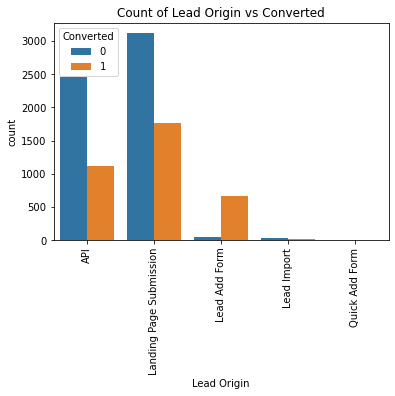

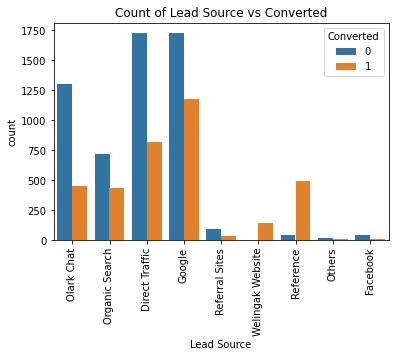

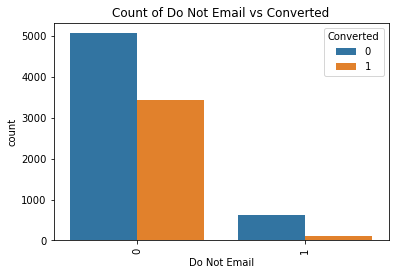

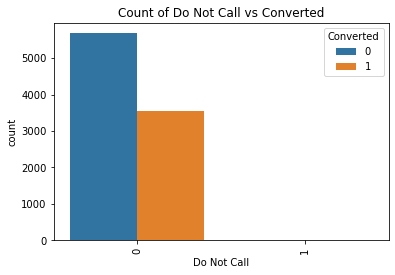

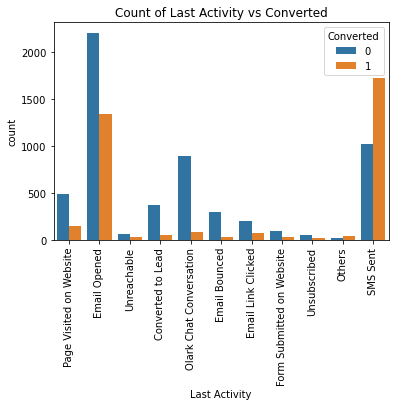

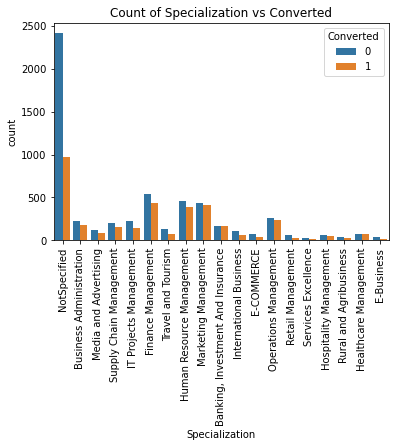

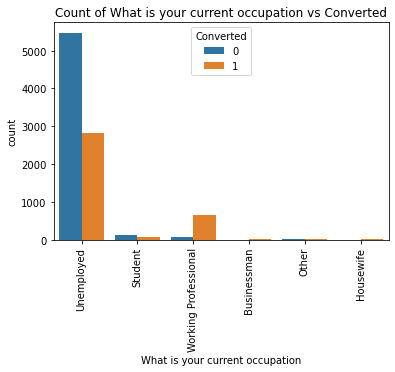

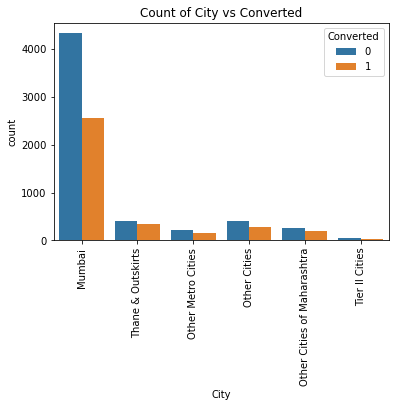

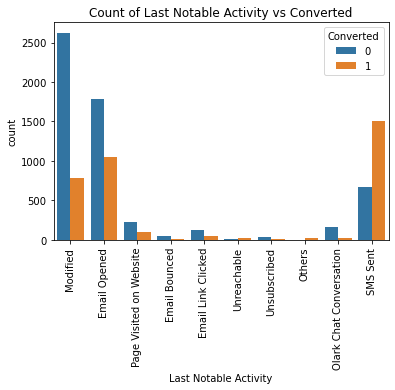

In [1302]:
# Count plots for all the categorical variables with the Target variable - Converted 
for i in cat_cols_lead_data:
    sns.countplot(x = i, hue = 'Converted', data=lead_data)
    plt.xlabel(i)
    plt.title("Count of "+i+" vs Converted")
    plt.xticks(rotation=90)
    plt.show()

Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

Lead Origin – 
Landing Page Submission and API are the two origin identifiers having almost 30-50% of conversion rate.
Though Lead Add Form count is very less, the conversion rate is pretty high almost 90%
Lead Import is minimal
Quick Add form have no counts. 

For better results, Should focus more on how to increase lead conversion rate from API and Landing Page Submission and also get more leads from Add Form.

Lead Source – 
Organic Search, Google and Direct Traffic are most number of Lead Sources having Lead conversion rate close or more than 50%.
Clients coming from Reference and Welingak Website mostly convert into a lead. There conversion rate is very high

Hence, for better results need to focus on the above Lead Sources

Do Not Email  and Do Not Call. 
Most of the clients almost 90% say Do Not Email and Do not Call. Hence no conclusions can be drawn from this.


Last Activity – 
Last Activity for most of the Clients is Email and Opened and conversion rate is almost 50%
Last Activity of SMS Sent has most highest conversion rate

Hence, for better results need to focus on people whose last activity is SMS Sent.


Specialisation – 
Most of the clients do not select this field (Not specified) – could be an undergrad student or who didn’t do any specialization. 
Management people, business and Finance have good conversion rate.

Hence, for better results need to focus more on above people that can give high conversion rate.


Current Occupation  – 

Most of the clients are Unemployed having conversion rate of 50%
Working Professionals have very high conversion rate.

Hence, for better results need to focus on people who are working professionals.


<AxesSubplot:>

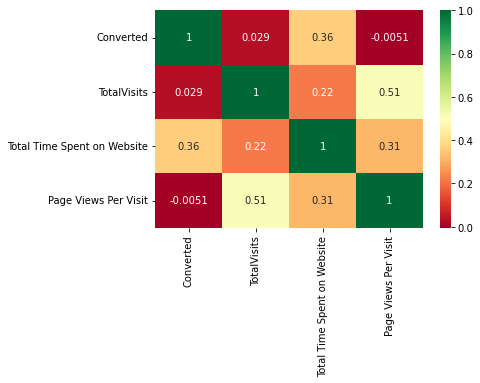

In [1303]:
sns.heatmap(lead_data[cont_cols_lead_data].corr(),annot=True,cmap="RdYlGn")

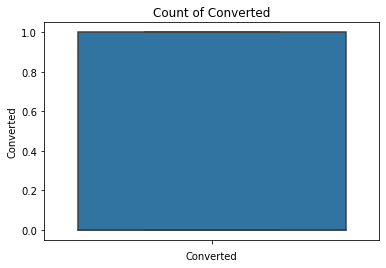

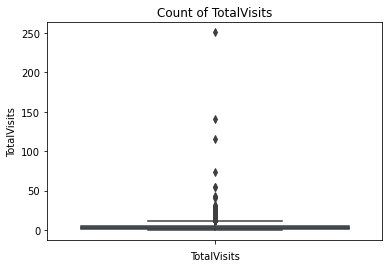

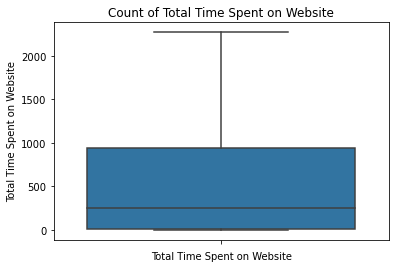

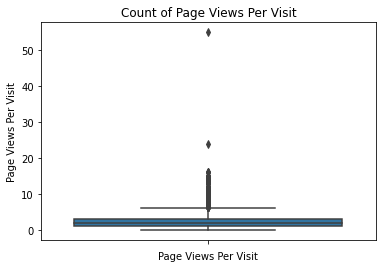

In [1304]:
# Count plots for all the continuos variables with the Target variable - Converted 

for i in cont_cols_lead_data:
    sns.boxplot(y=lead_data[i])
    plt.xlabel(i)
    plt.title("Count of "+i)
    plt.xticks(rotation=90)
    plt.show()

In [1305]:
#As we see most of them have Outliers, Treatment .. imputing the Outliers with Lower Bound and Upper bound
#Capping and Flooring 
#Interquartile Range (IQR) = ( 75th percentile(Q3) – 25 percentile(Q1))
#Lower Bound = Q1 - 1.5*IQR
#Upper Bound = Q3 + 1.5*IQR
#Values < Lower Bound  Lower Bound
#Values > Upper Bound  Upper Bound

for i in cont_cols_lead_data:
    q1=lead_data[i].describe()["25%"]
    q3=lead_data[i].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    lead_data[i]=np.where(lead_data[i]<lower_bound,lower_bound,lead_data[i])
    lead_data[i]=np.where(lead_data[i]>upper_bound,upper_bound,lead_data[i])

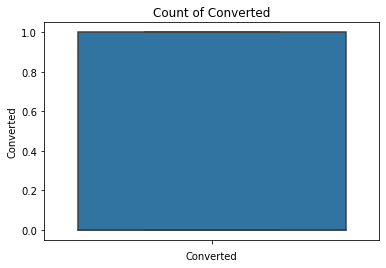

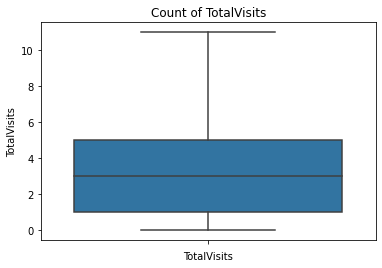

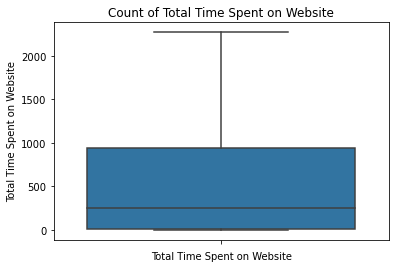

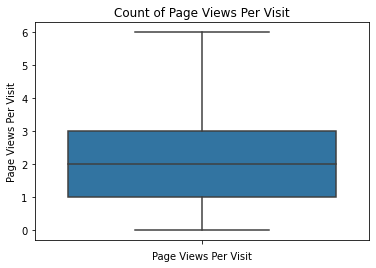

In [1306]:
for i in cont_cols_lead_data:
    sns.boxplot(y=lead_data[i])
    plt.xlabel(i)
    plt.title("Count of "+i)
    plt.xticks(rotation=90)
    plt.show()

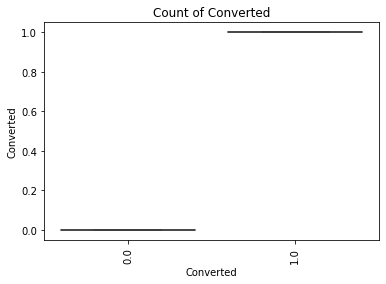

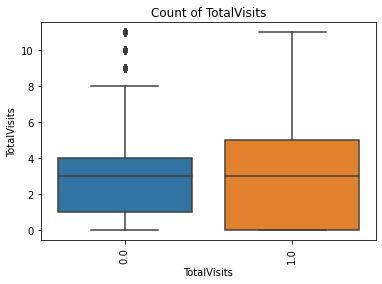

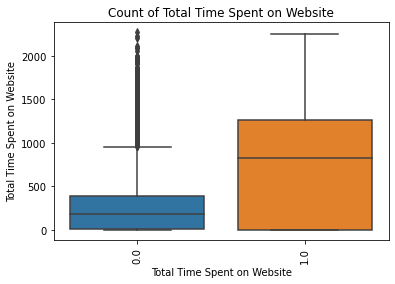

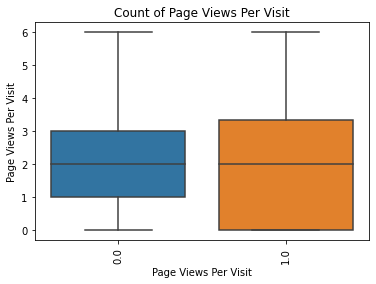

In [1307]:
for i in cont_cols_lead_data:
    sns.boxplot(y=i,x='Converted',data=lead_data)
    plt.xlabel(i)
    plt.title("Count of "+i)
    plt.xticks(rotation=90)
    plt.show()

Note:

By Total Visits and Pages Views per Visit, no inference can be drawn as median is same for Converted = 0 or 1
By Total Time Spent on Website, we can infer that clients who spent more time on the website convert into the lead

Hence , for better results designing the website in such a way that clients spent more time on the website (like can put videos of alumni or quotes ) will help.

In [1308]:
# look at the first 5 rows of the lead_data dataset
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0.0,0.0,0.0,Page Visited on Website,NotSpecified,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0.0,5.0,674.0,2.5,Email Opened,NotSpecified,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1.0,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0.0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1.0,2.0,1428.0,1.0,Converted to Lead,NotSpecified,Unemployed,Mumbai,Modified


## Data Preparation

In [1309]:
# look at the information of the columns of lead_data dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Origin                      9240 non-null   object 
 2   Lead Source                      9240 non-null   object 
 3   Do Not Email                     9240 non-null   int64  
 4   Do Not Call                      9240 non-null   int64  
 5   Converted                        9240 non-null   float64
 6   TotalVisits                      9240 non-null   float64
 7   Total Time Spent on Website      9240 non-null   float64
 8   Page Views Per Visit             9240 non-null   float64
 9   Last Activity                    9240 non-null   object 
 10  Specialization                   9240 non-null   object 
 11  What is your current occupation  9240 non-null   object 
 12  City                

In [1310]:
lead_data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [1311]:
lead_data["Lead Source"].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                28
Name: Lead Source, dtype: int64

In [1312]:
lead_data["Specialization"].value_counts()

NotSpecified                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1313]:
lead_data["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1314]:
lead_data["City"].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1315]:
lead_data["Last Notable Activity"].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Email Bounced                60
Unsubscribed                 47
Unreachable                  32
Others                       21
Name: Last Notable Activity, dtype: int64

# Creating Dummy Variables

In [1316]:
# First lets create the dummies for categorical variables
# Let's drop the first column from dummy variables using 'drop_first = True'
# Add the results to the original lead_data dataframe
# Drop the original column as we have created the dummies for it

lead_data_new = pd.get_dummies(lead_data[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
                                         "City","Last Notable Activity"]],drop_first=True)
lead_data  = pd.concat([lead_data,lead_data_new],axis=1)
lead_data = lead_data.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
                                         "City","Last Notable Activity"],axis=1)

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Do Not Email                                          9240 non-null   int64  
 2   Do Not Call                                           9240 non-null   int64  
 3   Converted                                             9240 non-null   float64
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   float64
 6   Page Views Per Visit                                  9240 non-null   float64
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

In [1317]:
# Previous to getting dummy variables the shape of the lead_data was 14 columns.
#After getting dummies it increased to 66 variables

# Perform Train-Test Split

In [1318]:
#Before model building, you first need to perform the test-train split and scale the features.

#Splitting the data into test and train Dataset
import sklearn
from sklearn.model_selection import train_test_split

#Putting feature variables in X
X = lead_data.drop(['Converted','Prospect ID'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532.0,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428.0,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1319]:
# Putting response variable to Y
Y = lead_data['Converted']

Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [1320]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [1321]:
from sklearn.preprocessing import StandardScaler

In [1322]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6795,0,0,0.275215,0.005716,-0.516439,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3516,0,0,0.624595,-0.691418,0.143543,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8105,0,0,0.624595,1.365219,1.553761,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1323]:
### Checking the Conversion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

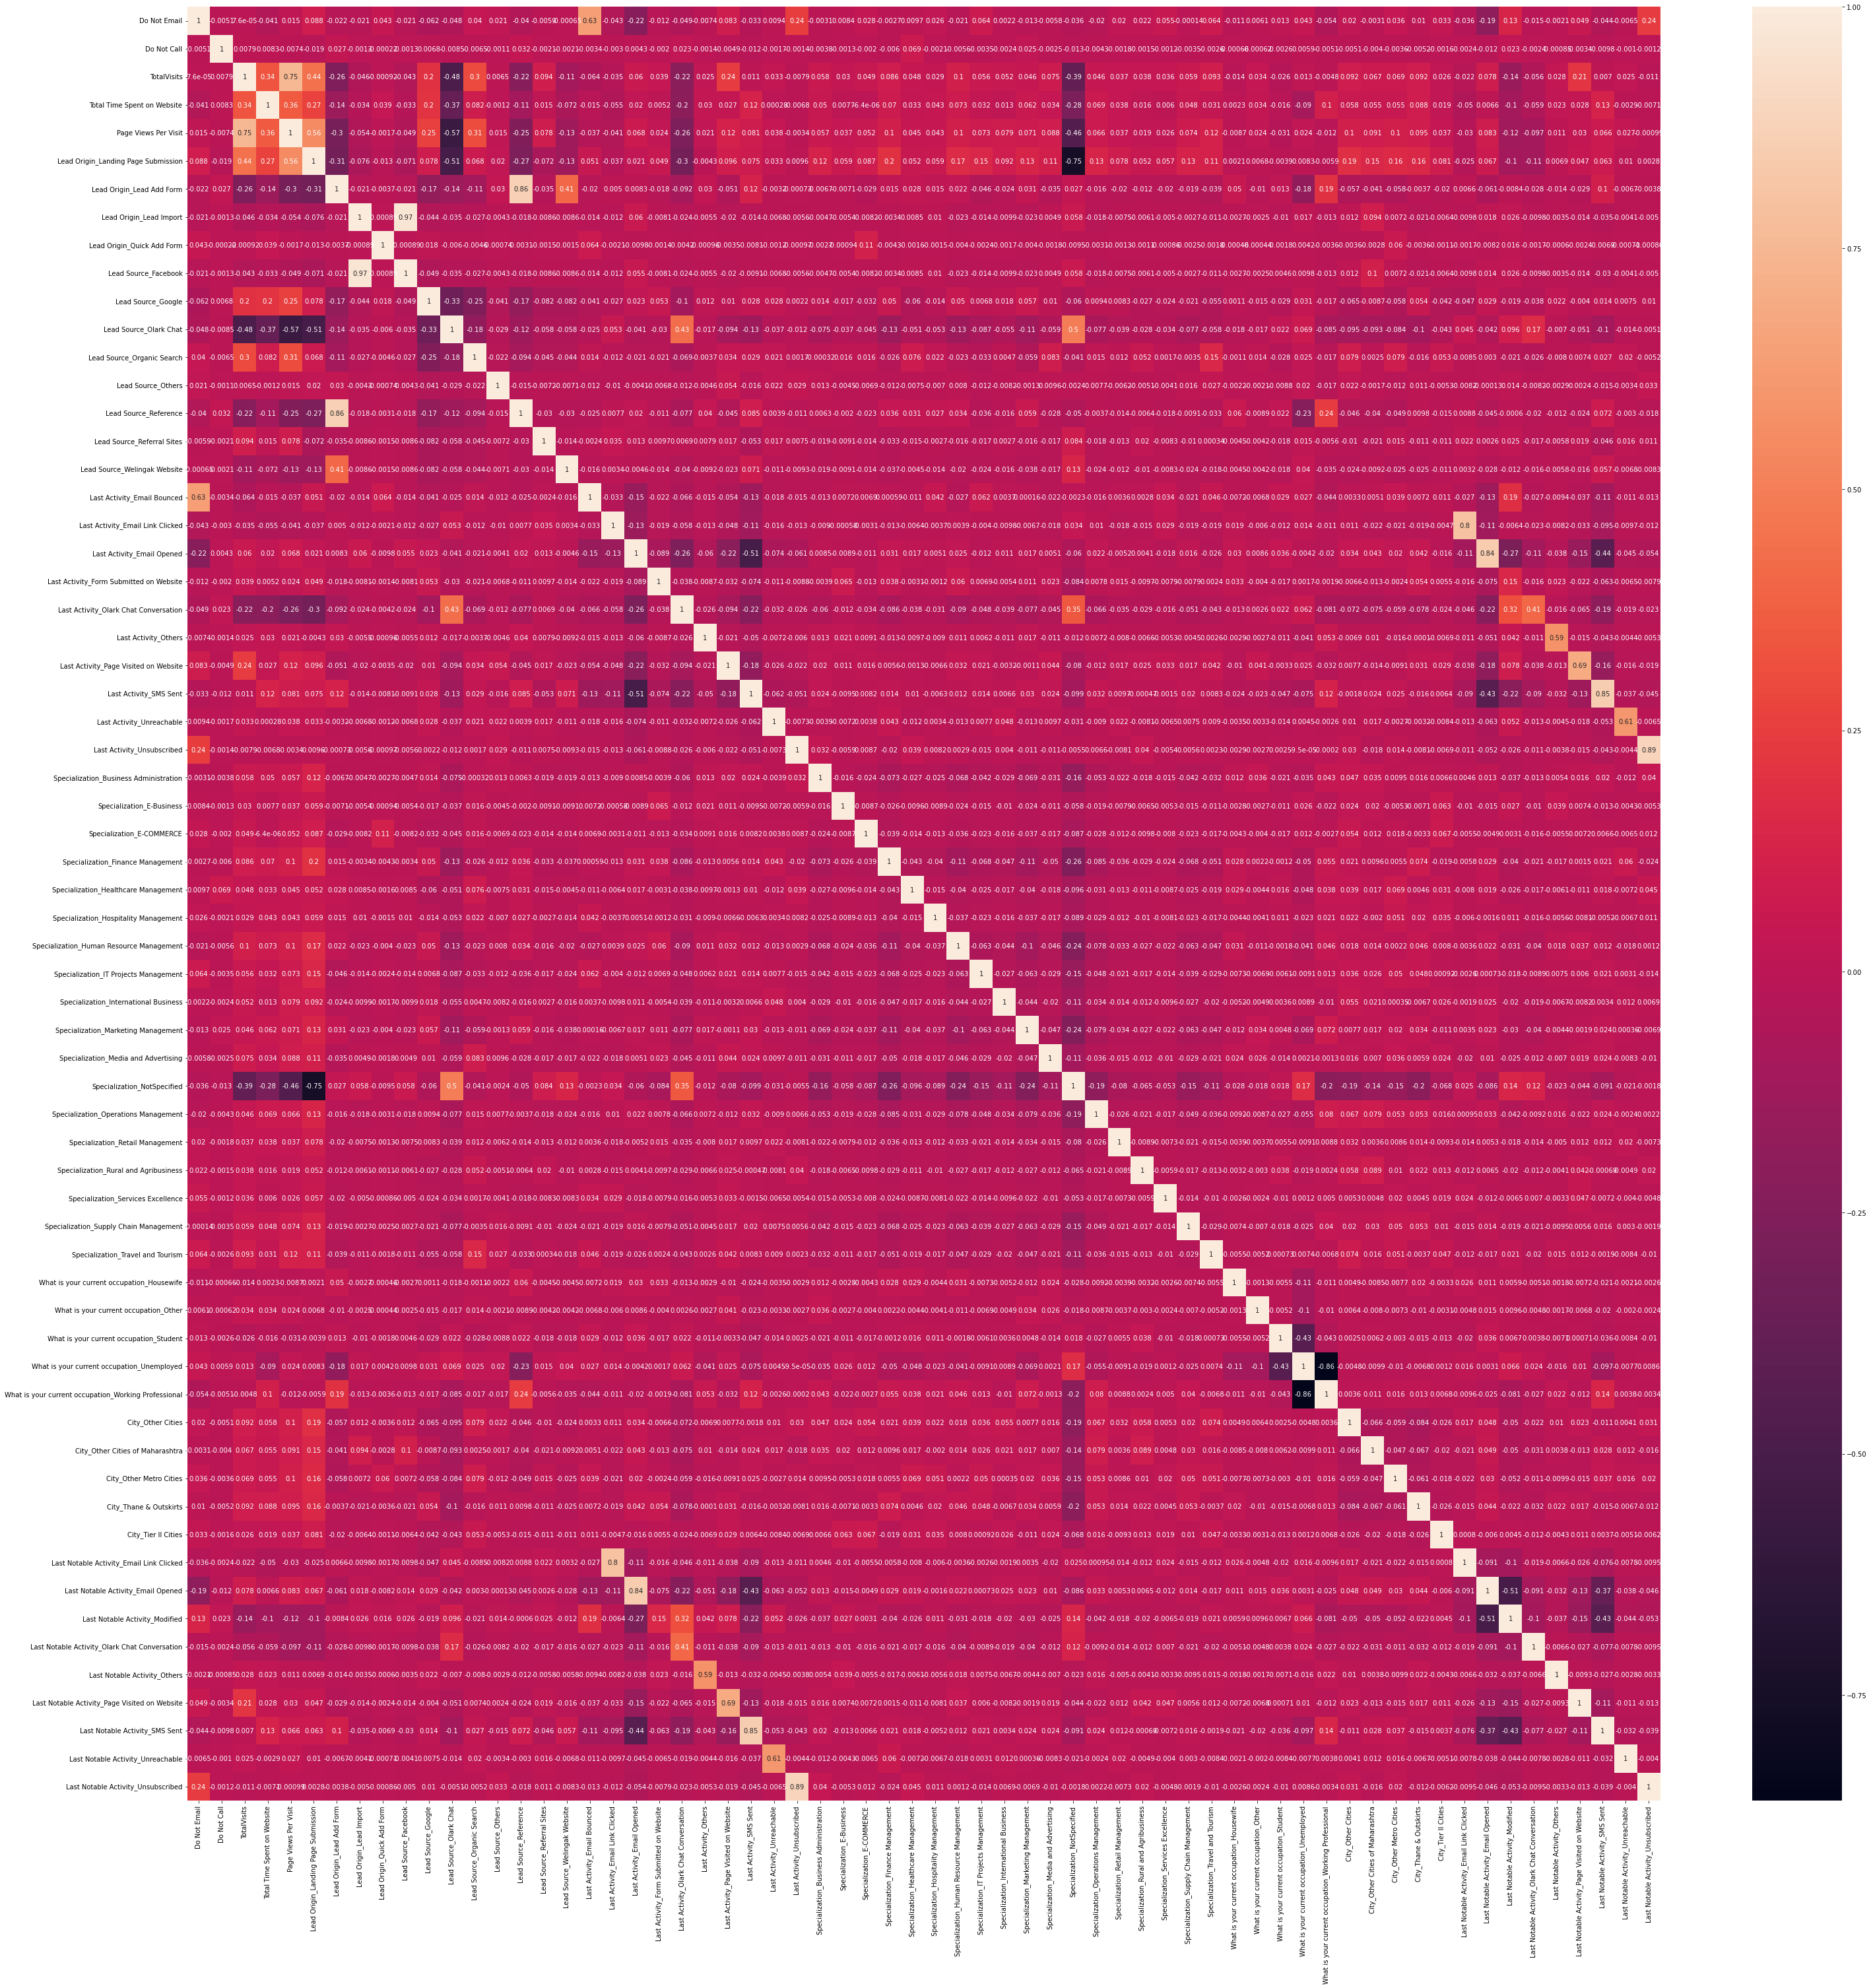

In [1324]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

 Dropping highly correlated dummy variables

In [1325]:
X_train = X_train.drop(["Lead Origin_Landing Page Submission","Last Notable Activity_Email Opened","Lead Origin_Lead Add Form","Lead Origin_Lead Import",
                            "What is your current occupation_Unemployed","Last Notable Activity_SMS Sent","Last Activity_Email Bounced",
                        "Last Notable Activity_Page Visited on Website","Last Notable Activity_Others","Last Notable Activity_Unsubscribed","Last Notable Activity_Unreachable"],axis=1) 
X_test = X_test.drop(["Lead Origin_Landing Page Submission","Last Notable Activity_Email Opened","Lead Origin_Lead Add Form","Lead Origin_Lead Import",
                            "What is your current occupation_Unemployed","Last Notable Activity_SMS Sent","Last Activity_Email Bounced",
                        "Last Notable Activity_Page Visited on Website","Last Notable Activity_Others","Last Notable Activity_Unsubscribed","Last Notable Activity_Unreachable"],axis=1)

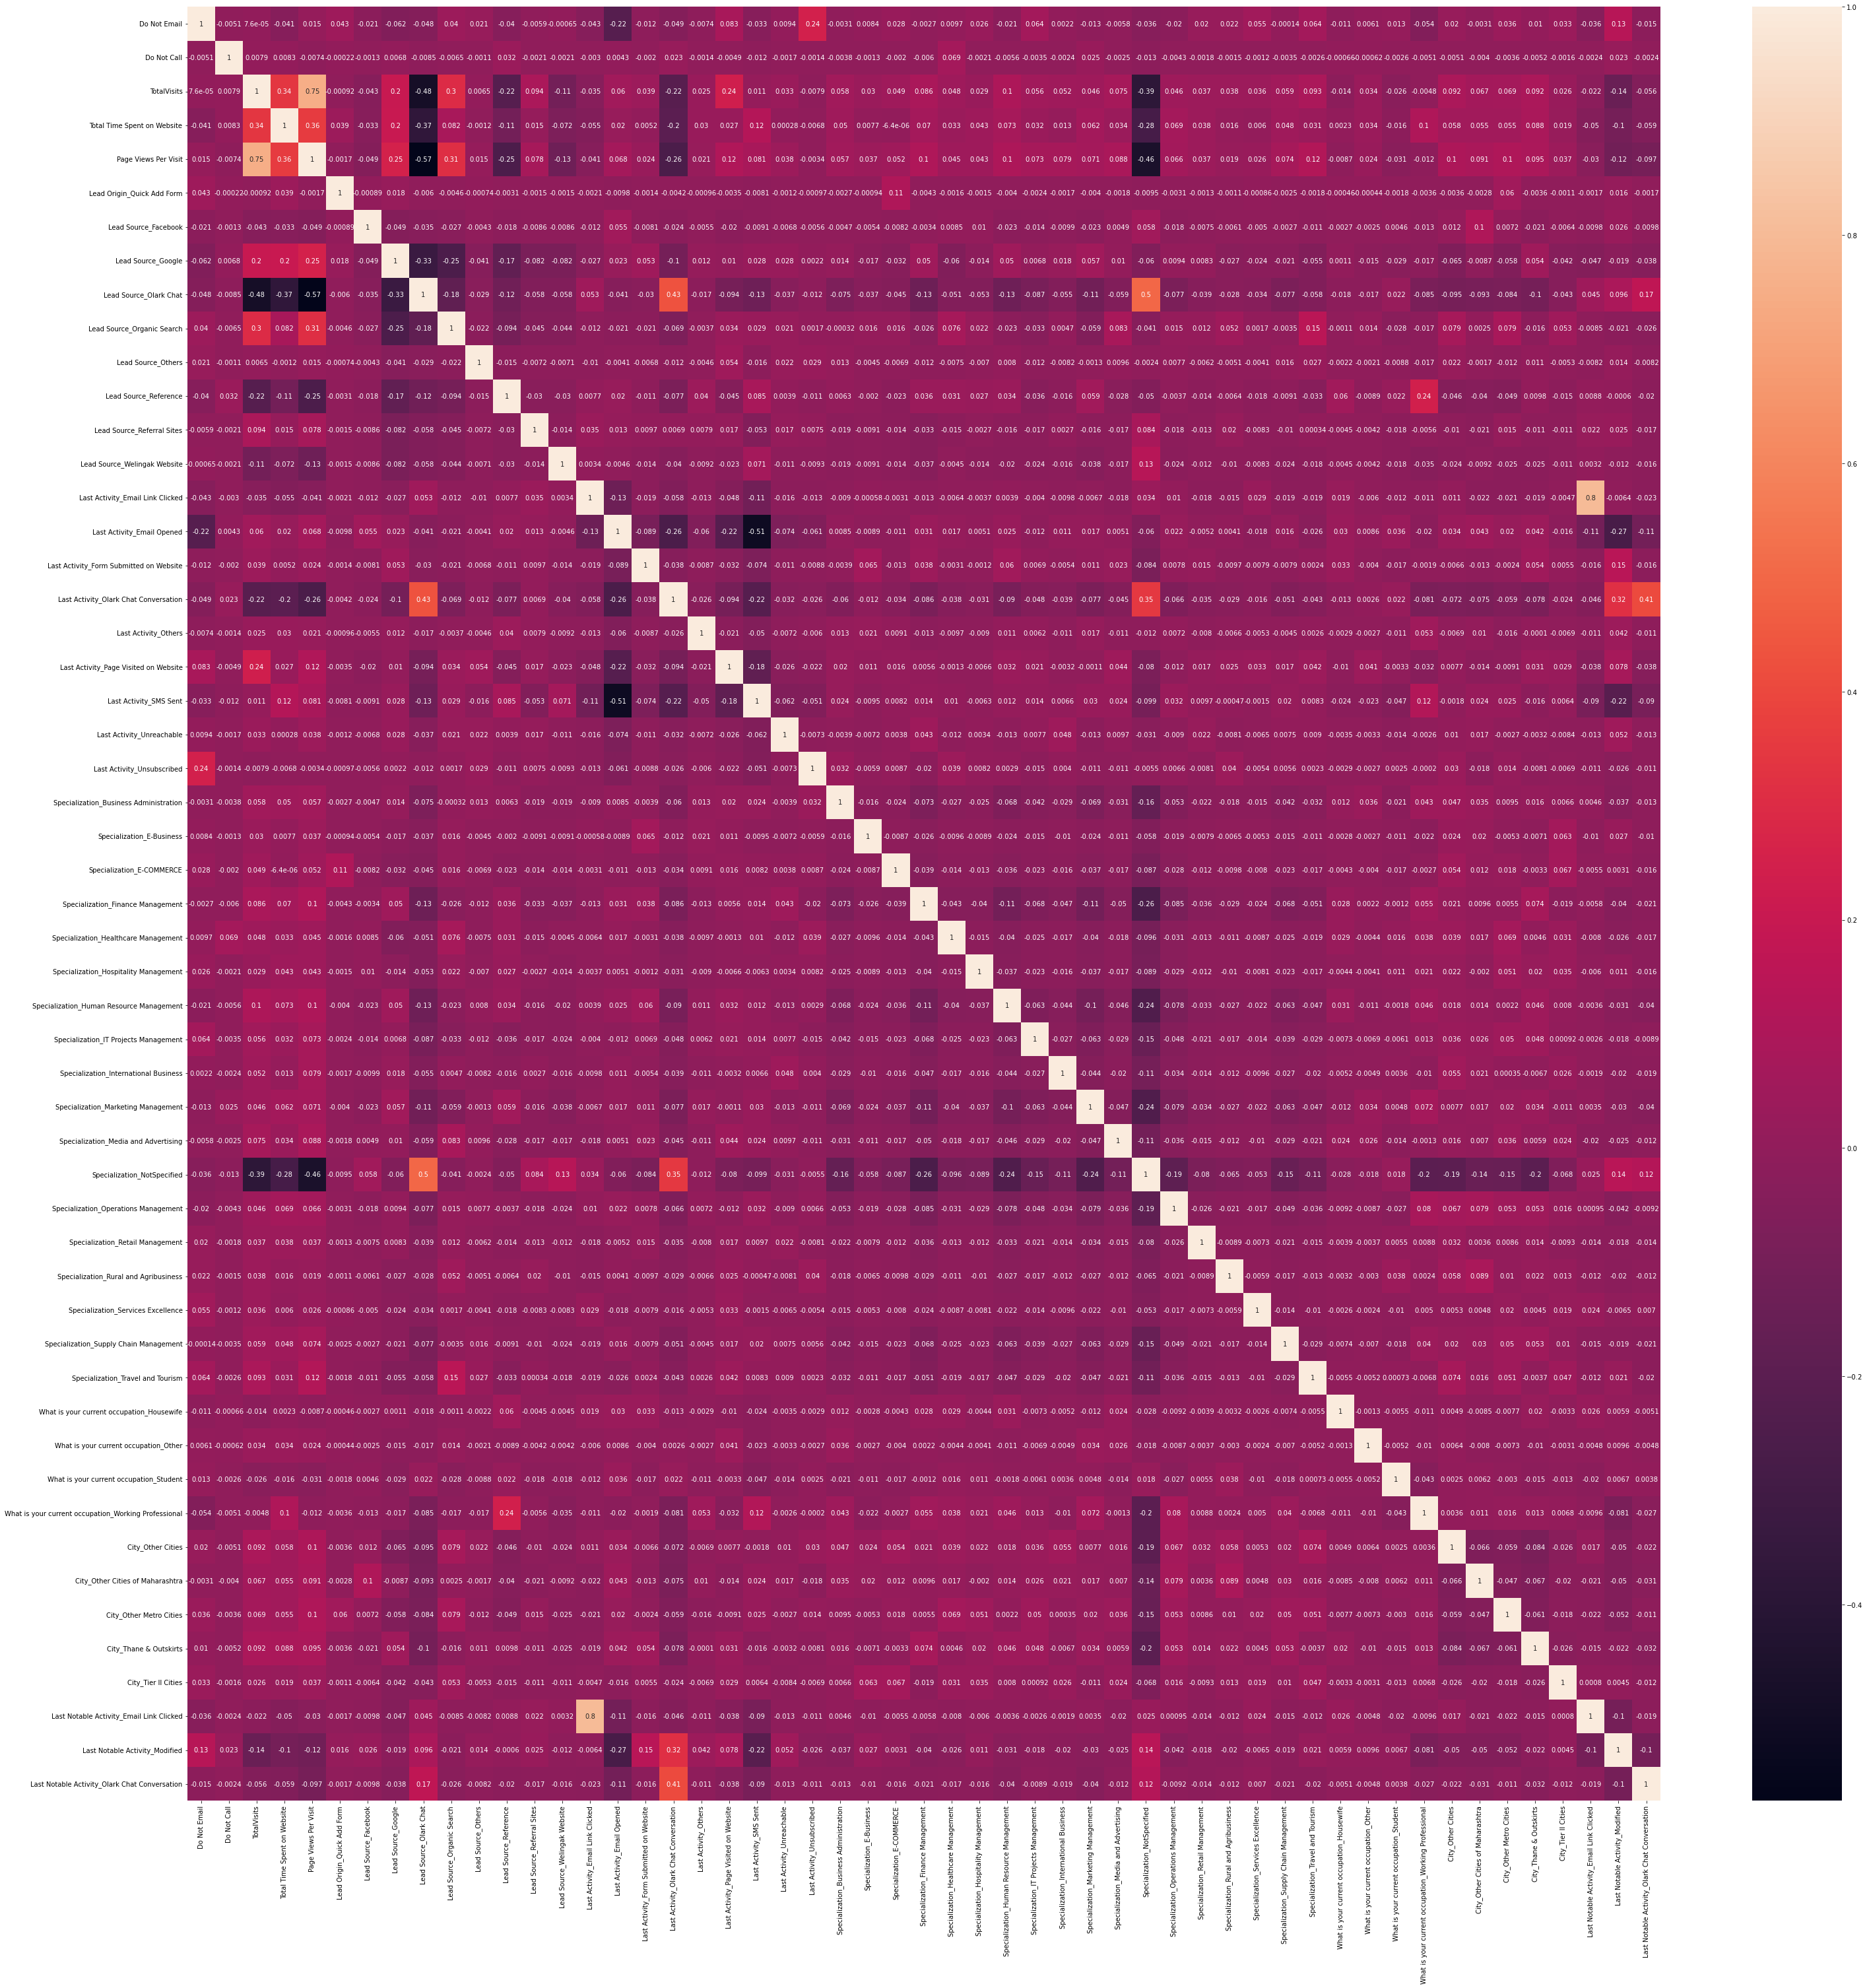

In [1326]:
# Let's see the correlation matrix  again
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model Building

In [1327]:
import statsmodels.api as sm

# Running Your First Training Model

In [1328]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.8
Date:                Tue, 21 Mar 2023   Deviance:                       5295.6
Time:                        20:08:45   Pearson chi2:                 7.67e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7102      0.276     -6.203      0.000      -2.251      -1.170
Do Not Email                                            -1.0262      0.186     -5.511      0.000      -1.391      -0.661
Do Not Call                                             21.9799   3.38e+04      0.001      0.999   -6.62e+04    6.63e+04
TotalVisits                                              0.2976      0.053      5.589      0.000       0.193       0.402
Total Time Spent on Website                              1.0715      0.040     26.849      0.000       0.993       1.150
Page Views Per Visit                                    -0.4239      0.060     -7.059      0.000      -0.542      -0.306
Lead Origin_Quick Add Form                              21.8842   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                     0.3493      0.521      0.670      0.503      -0.673       1.371
Lead Source_Google                                       0.6050      0.093      6.487      0.000       0.422       0.788
Lead Source_Olark Chat                                   1.5061      0.147     10.242      0.000       1.218       1.794
Lead Source_Organic Search                               0.4012      0.128      3.145      0.002       0.151       0.651
Lead Source_Others                                       1.3132      0.505      2.602      0.009       0.324       2.302
Lead Source_Reference                                    3.9001      0.226     17.263      0.000       3.457       4.343
Lead Source_Referral Sites                               0.5415      0.322      1.681      0.093      -0.090       1.173
Lead Source_Welingak Website                             6.0331      0.733      8.232      0.000       4.597       7.470
Last Activity_Email Link Clicked                         0.4793      0.422      1.136      0.256      -0.348       1.306
Last Activity_Email Opened                               0.5545      0.205      2.700      0.007       0.152       0.957
Last Activity_Form Submitted on Website                  0.3426      0.380      0.902      0.367      -0.402       1.087
Last Activity_Olark Chat Conversation                   -0.2634      0.261     -1.010      0.313      -0.775       0.248
Last Activity_Others                                     2.4305      0.508      4.787      0.000       1.435       3.426
Last Activity_Page Visited on Website                    0.0736      0.239      0.308      0.758      -0.395       0.542
Last Activity_SMS Sent                                   1.7908      0.202      8.849      0.000       1.394       2.187
Last Activity_Unreachable                                0

# Feature Selection Using RFE

In [1329]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1330]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, Y_train)

In [1331]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True])

In [1332]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 29),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Special

In [1333]:
col = X_train.columns[rfe.support_]

In [1334]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Quick Add Form', False, 5),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 29),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('Last Activity_Unsubscribed', True, 1),
 ('Specialization_Business Administration', False, 18),
 ('Special

In [1335]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_NotSpecified',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       '

# Assessing the model with StatsModels

In [1336]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [1337]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.4
Date:                Tue, 21 Mar 2023   Deviance:                       5410.9
Time:                        20:08:47   Pearson chi2:                 7.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3711      0.068    -20.296      0.000      -1.503      -1.239
Do Not Email                                            -1.1815      0.174     -6.787      0.000      -1.523      -0.840
Do Not Call                                             22.5558   3.39e+04      0.001      0.999   -6.64e+04    6.65e+04
Total Time Spent on Website                              1.0718      0.039     27.505      0.000       0.995       1.148
Lead Source_Google                                       0.3854      0.078      4.926      0.000       0.232       0.539
Lead Source_Olark Chat                                   1.2794      0.108     11.849      0.000       1.068       1.491
Lead Source_Others                                       1.0199      0.490      2.082      0.037       0.060       1.980
Lead Source_Reference                                    3.9490      0.209     18.920      0.000       3.540       4.358
Lead Source_Welingak Website                             5.7561      0.724      7.951      0.000       4.337       7.175
Last Activity_Olark Chat Conversation                   -0.6799      0.196     -3.477      0.001      -1.063      -0.297
Last Activity_Others                                     2.0181      0.470      4.298      0.000       1.098       2.938
Last Activity_SMS Sent                                   1.2714      0.074     17.255      0.000       1.127       1.416
Last Activity_Unreachable                                0.5822      0.362      1.606      0.108      -0.128       1.292
Last Activity_Unsubscribed                               0.8628      0.461      1.871      0.061      -0.041       1.767
Specialization_Hospitality Management                   -0.8729      0.323     -2.703      0.007      -1.506      -0.240
Specialization_Retail Management                        -0.4056      0.328     -1.238      0.216      -1.048       0.237
Specialization_Rural and Agribusiness                    0.7356      0.383      1.921      0.055      -0.015       1.486
What is your current occupation_Housewife               23.0956   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
What is your current occupation_Working Professional     2.7878      0.188     14.848      0.000       2.420       3.156
Last Notable Activity_Modified                          -0.9604      0.083    -11.596      0.000      -1.123      -0.798
Last Notable Activity_Olark Chat Conversation           -0.6943      0.369     -1.880      0.060      -1.418       0.030
========================================================================================================================
"""

In [1338]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1339]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,1.92
18,Last Notable Activity_Modified,1.71
4,Lead Source_Olark Chat,1.60
10,Last Activity_SMS Sent,1.33
3,Lead Source_Google,1.33
19,Last Notable Activity_Olark Chat Conversation,1.31
2,Total Time Spent on Website,1.24
6,Lead Source_Reference,1.21
0,Do Not Email,1.19
17,What is your current occupation_Working Profes...,1.17


In [1340]:
# # We could have 
# # - 1. high p value and high VIF , drop the variable
# # - 2. High p value and low VIF  , remove these
# # - 3. Low p value and high VIF  , remove these after above ones
# # - 4. Both Low - significant 

#Will keep eliminating the features on the basis of the p value till we get a model with good sensitivity
#There are a few variables with high p value. It's best to drop these variables as
#they aren't helping much with prediction and unnecessarily making the model complex.
#The variable 'What is your current occupation_Housewife' has the highest p value. So let's drop that.

X_train_rfe = X_train_rfe.drop(["What is your current occupation_Housewife"],axis=1) 


In [1341]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1342]:
X_train_rfe.shape


(6468, 19)

# Model 3


In [1343]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.3
Date:                Tue, 21 Mar 2023   Deviance:                       5426.6
Time:                        20:08:48   Pearson chi2:                 7.68e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3633      0.067    -20.229      0.000      -1.495      -1.231
Do Not Email                                            -1.1870      0.174     -6.820      0.000      -1.528      -0.846
Do Not Call                                             20.5377   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Total Time Spent on Website                              1.0706      0.039     27.512      0.000       0.994       1.147
Lead Source_Google                                       0.3864      0.078      4.948      0.000       0.233       0.539
Lead Source_Olark Chat                                   1.2733      0.108     11.810      0.000       1.062       1.485
Lead Source_Others                                       1.0137      0.490      2.071      0.038       0.054       1.973
Lead Source_Reference                                    3.9698      0.208     19.063      0.000       3.562       4.378
Lead Source_Welingak Website                             5.7492      0.724      7.941      0.000       4.330       7.168
Last Activity_Olark Chat Conversation                   -0.6896      0.195     -3.529      0.000      -1.073      -0.307
Last Activity_Others                                     2.0074      0.469      4.276      0.000       1.087       2.927
Last Activity_SMS Sent                                   1.2633      0.074     17.164      0.000       1.119       1.408
Last Activity_Unreachable                                0.5712      0.362      1.576      0.115      -0.139       1.281
Last Activity_Unsubscribed                               0.8615      0.461      1.869      0.062      -0.042       1.765
Specialization_Hospitality Management                   -0.8800      0.323     -2.726      0.006      -1.513      -0.247
Specialization_Retail Management                        -0.4099      0.328     -1.251      0.211      -1.052       0.232
Specialization_Rural and Agribusiness                    0.7292      0.383      1.906      0.057      -0.021       1.479
What is your current occupation_Working Professional     2.7807      0.188     14.817      0.000       2.413       3.149
Last Notable Activity_Modified                          -0.9546      0.083    -11.557      0.000      -1.116      -0.793
Last Notable Activity_Olark Chat Conversation           -0.6884      0.369     -1.864      0.062      -1.412       0.035
========================================================================================================================
"""

In [1344]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Olark Chat Conversation,1.92
17,Last Notable Activity_Modified,1.71
4,Lead Source_Olark Chat,1.60
3,Lead Source_Google,1.33
10,Last Activity_SMS Sent,1.32
18,Last Notable Activity_Olark Chat Conversation,1.31
2,Total Time Spent on Website,1.24
6,Lead Source_Reference,1.20
0,Do Not Email,1.19
16,What is your current occupation_Working Profes...,1.17


In [1345]:
#The variable 'Do Not Call' has the highest p value. So let's drop that.
X_train_rfe = X_train_rfe.drop(["Do Not Call"],axis=1) 


In [1346]:
col = col.drop('Do Not Call', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1347]:
X_train_rfe.shape


(6468, 18)

# Model 4

In [1348]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.6
Date:                Tue, 21 Mar 2023   Deviance:                       5429.3
Time:                        20:08:48   Pearson chi2:                 7.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3638      0.067    -20.232      0.000      -1.496      -1.232
Do Not Email                                            -1.1883      0.174     -6.825      0.000      -1.530      -0.847
Total Time Spent on Website                              1.0714      0.039     27.536      0.000       0.995       1.148
Lead Source_Google                                       0.3877      0.078      4.966      0.000       0.235       0.541
Lead Source_Olark Chat                                   1.2722      0.108     11.803      0.000       1.061       1.483
Lead Source_Others                                       1.0132      0.489      2.070      0.038       0.054       1.973
Lead Source_Reference                                    3.9892      0.208     19.136      0.000       3.581       4.398
Lead Source_Welingak Website                             5.7500      0.724      7.943      0.000       4.331       7.169
Last Activity_Olark Chat Conversation                   -0.6752      0.194     -3.484      0.000      -1.055      -0.295
Last Activity_Others                                     2.0062      0.470      4.273      0.000       1.086       2.926
Last Activity_SMS Sent                                   1.2628      0.074     17.153      0.000       1.118       1.407
Last Activity_Unreachable                                0.5695      0.362      1.571      0.116      -0.141       1.280
Last Activity_Unsubscribed                               0.8628      0.461      1.872      0.061      -0.041       1.766
Specialization_Hospitality Management                   -0.8834      0.323     -2.735      0.006      -1.516      -0.250
Specialization_Retail Management                        -0.4108      0.328     -1.254      0.210      -1.053       0.231
Specialization_Rural and Agribusiness                    0.7290      0.383      1.905      0.057      -0.021       1.479
What is your current occupation_Working Professional     2.7793      0.188     14.809      0.000       2.411       3.147
Last Notable Activity_Modified                          -0.9531      0.083    -11.542      0.000      -1.115      -0.791
Last Notable Activity_Olark Chat Conversation           -0.7019      0.369     -1.905      0.057      -1.424       0.020
========================================================================================================================
"""

In [1349]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.91
16,Last Notable Activity_Modified,1.71
3,Lead Source_Olark Chat,1.60
2,Lead Source_Google,1.33
9,Last Activity_SMS Sent,1.32
17,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24
5,Lead Source_Reference,1.20
0,Do Not Email,1.19
15,What is your current occupation_Working Profes...,1.17


In [1350]:
#The variable 'Specialization_Retail Management' has the highest p value. So let's drop that.

X_train_rfe = X_train_rfe.drop(["Specialization_Retail Management"],axis=1) 


In [1351]:
col = col.drop('Specialization_Retail Management', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1352]:
X_train_rfe.shape


(6468, 17)

# Model 5

In [1353]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.4
Date:                Tue, 21 Mar 2023   Deviance:                       5430.9
Time:                        20:08:48   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3872
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3685      0.067    -20.333      0.000      -1.500      -1.237
Do Not Email                                            -1.1934      0.174     -6.857      0.000      -1.535      -0.852
Total Time Spent on Website                              1.0698      0.039     27.525      0.000       0.994       1.146
Lead Source_Google                                       0.3882      0.078      4.973      0.000       0.235       0.541
Lead Source_Olark Chat                                   1.2739      0.108     11.818      0.000       1.063       1.485
Lead Source_Others                                       1.0188      0.489      2.082      0.037       0.060       1.978
Lead Source_Reference                                    3.9897      0.208     19.145      0.000       3.581       4.398
Lead Source_Welingak Website                             5.7543      0.724      7.949      0.000       4.335       7.173
Last Activity_Olark Chat Conversation                   -0.6729      0.194     -3.472      0.001      -1.053      -0.293
Last Activity_Others                                     2.0104      0.469      4.283      0.000       1.090       2.930
Last Activity_SMS Sent                                   1.2620      0.074     17.148      0.000       1.118       1.406
Last Activity_Unreachable                                0.5564      0.363      1.532      0.126      -0.156       1.268
Last Activity_Unsubscribed                               0.8715      0.461      1.891      0.059      -0.032       1.775
Specialization_Hospitality Management                   -0.8772      0.323     -2.717      0.007      -1.510      -0.244
Specialization_Rural and Agribusiness                    0.7338      0.383      1.918      0.055      -0.016       1.484
What is your current occupation_Working Professional     2.7760      0.188     14.788      0.000       2.408       3.144
Last Notable Activity_Modified                          -0.9525      0.083    -11.535      0.000      -1.114      -0.791
Last Notable Activity_Olark Chat Conversation           -0.7008      0.368     -1.902      0.057      -1.423       0.021
========================================================================================================================
"""

In [1354]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.91
15,Last Notable Activity_Modified,1.71
3,Lead Source_Olark Chat,1.60
2,Lead Source_Google,1.32
9,Last Activity_SMS Sent,1.32
16,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24
5,Lead Source_Reference,1.20
0,Do Not Email,1.19
14,What is your current occupation_Working Profes...,1.17


In [1355]:
#The variable 'Last Activity_Unreachable' has the highest p value. So let's drop that.
X_train_rfe = X_train_rfe.drop(["Last Activity_Unreachable"],axis=1) 


In [1356]:
col = col.drop('Last Activity_Unreachable', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1357]:
X_train_rfe.shape


(6468, 16)

# Model 6


In [1358]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm6 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.5
Date:                Tue, 21 Mar 2023   Deviance:                       5433.1
Time:                        20:08:49   Pearson chi2:                 7.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3627      0.067    -20.292      0.000      -1.494      -1.231
Do Not Email                                            -1.1931      0.174     -6.856      0.000      -1.534      -0.852
Total Time Spent on Website                              1.0682      0.039     27.513      0.000       0.992       1.144
Lead Source_Google                                       0.3910      0.078      5.012      0.000       0.238       0.544
Lead Source_Olark Chat                                   1.2705      0.108     11.795      0.000       1.059       1.482
Lead Source_Others                                       1.0451      0.487      2.147      0.032       0.091       1.999
Lead Source_Reference                                    3.9884      0.208     19.142      0.000       3.580       4.397
Lead Source_Welingak Website                             5.7475      0.724      7.940      0.000       4.329       7.166
Last Activity_Olark Chat Conversation                   -0.6846      0.194     -3.536      0.000      -1.064      -0.305
Last Activity_Others                                     1.9999      0.469      4.263      0.000       1.080       2.919
Last Activity_SMS Sent                                   1.2544      0.073     17.099      0.000       1.111       1.398
Last Activity_Unsubscribed                               0.8636      0.461      1.875      0.061      -0.039       1.766
Specialization_Hospitality Management                   -0.8767      0.323     -2.714      0.007      -1.510      -0.243
Specialization_Rural and Agribusiness                    0.7285      0.382      1.905      0.057      -0.021       1.478
What is your current occupation_Working Professional     2.7729      0.188     14.783      0.000       2.405       3.140
Last Notable Activity_Modified                          -0.9455      0.082    -11.476      0.000      -1.107      -0.784
Last Notable Activity_Olark Chat Conversation           -0.6931      0.368     -1.882      0.060      -1.415       0.029
========================================================================================================================
"""

In [1359]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.91
14,Last Notable Activity_Modified,1.70
3,Lead Source_Olark Chat,1.60
2,Lead Source_Google,1.32
9,Last Activity_SMS Sent,1.32
15,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24
5,Lead Source_Reference,1.20
0,Do Not Email,1.19
13,What is your current occupation_Working Profes...,1.17


In [1360]:
#The variable 'Last Activity_Unsubscribed' has the highest p value. So let's drop that.
X_train_rfe = X_train_rfe.drop(["Last Activity_Unsubscribed"],axis=1) 


In [1361]:
col = col.drop('Last Activity_Unsubscribed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1362]:
X_train_rfe.shape


(6468, 15)

# Model 7

In [1363]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm7 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.1
Date:                Tue, 21 Mar 2023   Deviance:                       5436.3
Time:                        20:08:49   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3585      0.067    -20.259      0.000      -1.490      -1.227
Do Not Email                                            -1.0974      0.163     -6.721      0.000      -1.417      -0.777
Total Time Spent on Website                              1.0678      0.039     27.509      0.000       0.992       1.144
Lead Source_Google                                       0.3923      0.078      5.029      0.000       0.239       0.545
Lead Source_Olark Chat                                   1.2717      0.108     11.811      0.000       1.061       1.483
Lead Source_Others                                       1.0710      0.488      2.196      0.028       0.115       2.027
Lead Source_Reference                                    3.9832      0.208     19.130      0.000       3.575       4.391
Lead Source_Welingak Website                             5.7350      0.724      7.926      0.000       4.317       7.153
Last Activity_Olark Chat Conversation                   -0.6849      0.194     -3.539      0.000      -1.064      -0.306
Last Activity_Others                                     1.9943      0.469      4.254      0.000       1.075       2.913
Last Activity_SMS Sent                                   1.2454      0.073     17.033      0.000       1.102       1.389
Specialization_Hospitality Management                   -0.8609      0.322     -2.674      0.007      -1.492      -0.230
Specialization_Rural and Agribusiness                    0.7411      0.384      1.930      0.054      -0.011       1.494
What is your current occupation_Working Professional     2.7763      0.188     14.790      0.000       2.408       3.144
Last Notable Activity_Modified                          -0.9520      0.082    -11.566      0.000      -1.113      -0.791
Last Notable Activity_Olark Chat Conversation           -0.6993      0.368     -1.899      0.058      -1.421       0.022
========================================================================================================================
"""

In [1364]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Olark Chat Conversation,1.91
13,Last Notable Activity_Modified,1.69
3,Lead Source_Olark Chat,1.60
2,Lead Source_Google,1.32
9,Last Activity_SMS Sent,1.32
14,Last Notable Activity_Olark Chat Conversation,1.31
1,Total Time Spent on Website,1.24
5,Lead Source_Reference,1.20
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


In [1365]:
#The variable 'Last Notable Activity_Olark Chat Conversation' has the highest p value. So let's drop that.
X_train_rfe = X_train_rfe.drop(["Last Notable Activity_Olark Chat Conversation"],axis=1) 


In [1366]:
col = col.drop('Last Notable Activity_Olark Chat Conversation', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

# Model 8

In [1367]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm8 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.1
Date:                Tue, 21 Mar 2023   Deviance:                       5440.1
Time:                        20:08:49   Pearson chi2:                 7.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3657      0.067    -20.402      0.000      -1.497      -1.235
Do Not Email                                            -1.1038      0.163     -6.771      0.000      -1.423      -0.784
Total Time Spent on Website                              1.0640      0.039     27.477      0.000       0.988       1.140
Lead Source_Google                                       0.3902      0.078      5.009      0.000       0.238       0.543
Lead Source_Olark Chat                                   1.2679      0.108     11.780      0.000       1.057       1.479
Lead Source_Others                                       1.0730      0.487      2.201      0.028       0.118       2.028
Lead Source_Reference                                    3.9705      0.208     19.090      0.000       3.563       4.378
Lead Source_Welingak Website                             5.7248      0.723      7.913      0.000       4.307       7.143
Last Activity_Olark Chat Conversation                   -0.8912      0.169     -5.273      0.000      -1.222      -0.560
Last Activity_Others                                     1.9803      0.468      4.230      0.000       1.063       2.898
Last Activity_SMS Sent                                   1.2467      0.073     17.075      0.000       1.104       1.390
Specialization_Hospitality Management                   -0.8561      0.322     -2.662      0.008      -1.486      -0.226
Specialization_Rural and Agribusiness                    0.7406      0.384      1.931      0.053      -0.011       1.492
What is your current occupation_Working Professional     2.7780      0.188     14.791      0.000       2.410       3.146
Last Notable Activity_Modified                          -0.9137      0.079    -11.496      0.000      -1.069      -0.758
========================================================================================================================
"""

In [1368]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.60
13,Last Notable Activity_Modified,1.58
7,Last Activity_Olark Chat Conversation,1.55
9,Last Activity_SMS Sent,1.32
2,Lead Source_Google,1.31
1,Total Time Spent on Website,1.23
5,Lead Source_Reference,1.20
12,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
6,Lead Source_Welingak Website,1.03


In [1369]:
#The variable 'Specialization_Rural and Agribusiness' has the highest p value. So let's drop that.
X_train_rfe = X_train_rfe.drop(["Specialization_Rural and Agribusiness"],axis=1) 


In [1370]:
col = col.drop('Specialization_Rural and Agribusiness', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

# Model 8

In [1371]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm8 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2721.9
Date:                Tue, 21 Mar 2023   Deviance:                       5443.7
Time:                        20:08:50   Pearson chi2:                 7.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3860
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3549      0.067    -20.337      0.000      -1.485      -1.224
Do Not Email                                            -1.1010      0.163     -6.757      0.000      -1.420      -0.782
Total Time Spent on Website                              1.0635      0.039     27.478      0.000       0.988       1.139
Lead Source_Google                                       0.3835      0.078      4.930      0.000       0.231       0.536
Lead Source_Olark Chat                                   1.2612      0.107     11.732      0.000       1.051       1.472
Lead Source_Others                                       1.0626      0.487      2.180      0.029       0.107       2.018
Lead Source_Reference                                    3.9655      0.208     19.076      0.000       3.558       4.373
Lead Source_Welingak Website                             5.7143      0.723      7.899      0.000       4.296       7.132
Last Activity_Olark Chat Conversation                   -0.8959      0.169     -5.303      0.000      -1.227      -0.565
Last Activity_Others                                     1.9737      0.468      4.215      0.000       1.056       2.891
Last Activity_SMS Sent                                   1.2441      0.073     17.053      0.000       1.101       1.387
Specialization_Hospitality Management                   -0.8624      0.321     -2.683      0.007      -1.492      -0.232
What is your current occupation_Working Professional     2.7764      0.188     14.792      0.000       2.409       3.144
Last Notable Activity_Modified                          -0.9141      0.079    -11.505      0.000      -1.070      -0.758
========================================================================================================================
"""

In [1372]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.60
12,Last Notable Activity_Modified,1.58
7,Last Activity_Olark Chat Conversation,1.55
9,Last Activity_SMS Sent,1.32
2,Lead Source_Google,1.31
1,Total Time Spent on Website,1.23
5,Lead Source_Reference,1.20
11,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.10
6,Lead Source_Welingak Website,1.03


In [1373]:
#As we see that all the features have low p value now. Will check the VIF which also low for all. Hence we will check if any
#correlation is still left between features using a heatmap

<AxesSubplot:>

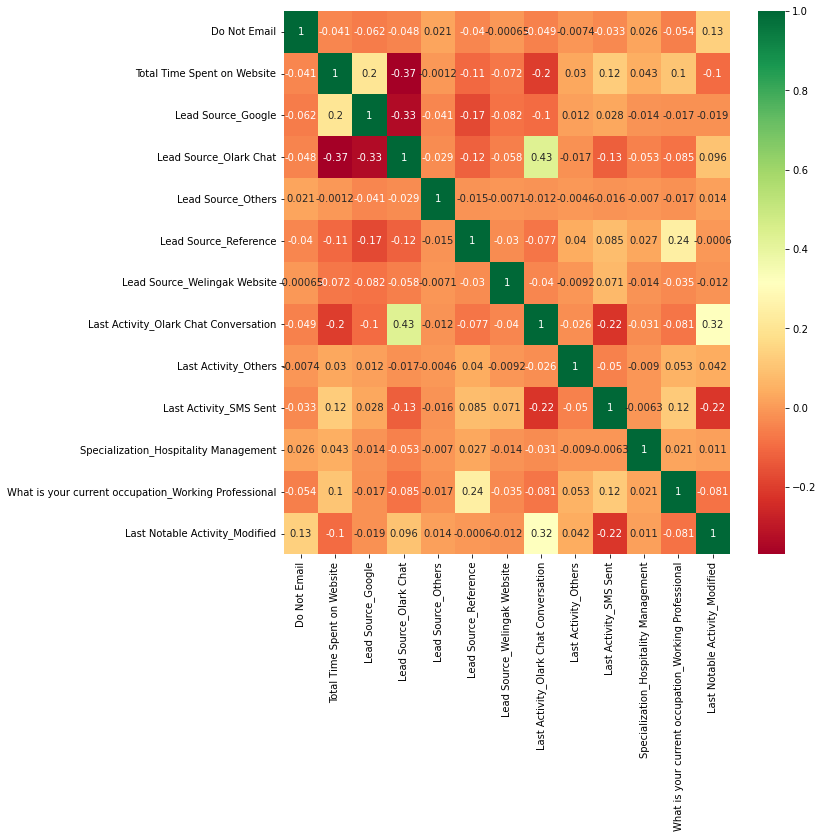

In [1374]:
#Again Check correlation using HeatMap
plt.figure(figsize=(10,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap="RdYlGn")

In [1375]:
#Drop highly correlated variable
X_train_rfe = X_train_rfe.drop(["Last Activity_Olark Chat Conversation"],axis=1) 

In [1376]:
col = col.drop(["Last Activity_Olark Chat Conversation"], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

<AxesSubplot:>

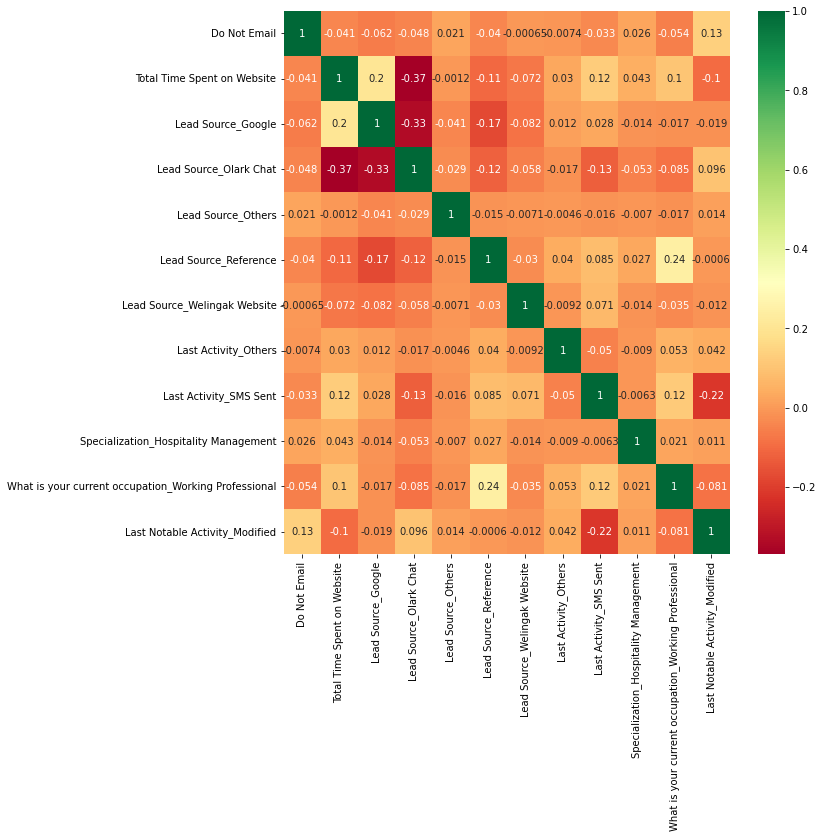

In [1377]:
#Again Check correlation using HeatMap again
plt.figure(figsize=(10,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap="RdYlGn")

In [1378]:
X_train_rfe.shape


(6468, 12)

# Model 9

In [1379]:
# Let's re-run the model using the selected variables
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
logm9 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.7
Date:                Tue, 21 Mar 2023   Deviance:                       5475.5
Time:                        20:08:51   Pearson chi2:                 7.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3747      0.067    -20.570      0.000      -1.506      -1.244
Do Not Email                                            -1.0651      0.163     -6.518      0.000      -1.385      -0.745
Total Time Spent on Website                              1.0708      0.039     27.584      0.000       0.995       1.147
Lead Source_Google                                       0.3767      0.078      4.826      0.000       0.224       0.530
Lead Source_Olark Chat                                   1.1041      0.104     10.639      0.000       0.901       1.307
Lead Source_Others                                       1.0651      0.489      2.179      0.029       0.107       2.023
Lead Source_Reference                                    4.0137      0.209     19.240      0.000       3.605       4.423
Lead Source_Welingak Website                             5.7558      0.724      7.951      0.000       4.337       7.175
Last Activity_Others                                     2.0877      0.470      4.440      0.000       1.166       3.009
Last Activity_SMS Sent                                   1.3113      0.073     18.081      0.000       1.169       1.453
Specialization_Hospitality Management                   -0.8643      0.323     -2.674      0.007      -1.498      -0.231
What is your current occupation_Working Professional     2.8006      0.188     14.908      0.000       2.432       3.169
Last Notable Activity_Modified                          -1.0304      0.077    -13.404      0.000      -1.181      -0.880
========================================================================================================================
"""

In [1380]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.42
3,Lead Source_Olark Chat,1.33
2,Lead Source_Google,1.31
8,Last Activity_SMS Sent,1.29
1,Total Time Spent on Website,1.23
5,Lead Source_Reference,1.20
10,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.09
6,Lead Source_Welingak Website,1.03
7,Last Activity_Others,1.02


In [1381]:
#Final Model have these columns (12 predictor variables):
X_train_rfe.columns
    

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [1382]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

1871    0.228166
6795    0.202848
3516    0.266783
8105    0.855098
3934    0.095428
4844    0.991268
3297    0.103749
8071    0.998009
987     0.147252
7423    0.918909
dtype: float64

In [1383]:
# Creating a dataframe with the actual Converted variable and the predicted probabilities

In [1384]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final['Prospect ID'] = Y_train.index
Y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
1871,0.0,0.228166,1871
6795,0.0,0.202848,6795
3516,0.0,0.266783,3516
8105,0.0,0.855098,8105
3934,0.0,0.095428,3934


In [1385]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1386]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,predicted
1871,0.0,0.228166,1871,0
6795,0.0,0.202848,6795,0
3516,0.0,0.266783,3516,0
8105,0.0,0.855098,8105,1
3934,0.0,0.095428,3934,0
4844,1.0,0.991268,4844,1
3297,0.0,0.103749,3297,0
8071,1.0,0.998009,8071,1
987,0.0,0.147252,987,0
7423,1.0,0.918909,7423,1


In [1387]:
from sklearn import metrics

In [1388]:
#confusion matrix
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted )
print(confusion)# Residual Analysis of the train data

[[3557  445]
 [ 751 1715]]


In [1389]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.8150896722325294


In [1390]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1391]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6954582319545823


In [1392]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8888055972013993


In [1393]:
#Though Accuracy and Specificty is good, Sensitivity is still low.

In [1394]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1395]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.42
3,Lead Source_Olark Chat,1.33
2,Lead Source_Google,1.31
8,Last Activity_SMS Sent,1.29
1,Total Time Spent on Website,1.23
5,Lead Source_Reference,1.20
10,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.09
6,Lead Source_Welingak Website,1.03
7,Last Activity_Others,1.02


# Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1396]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1397]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob, drop_intermediate = False )

# Conclusions

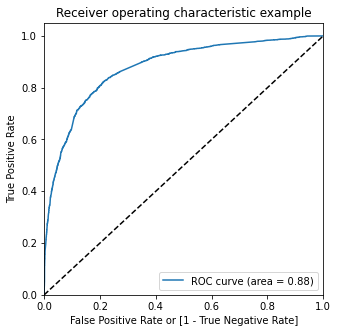

In [1398]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1399]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0.0,0.228166,1871,0,1,1,1,0,0,0,0,0,0,0
6795,0.0,0.202848,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0.0,0.266783,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0.0,0.855098,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0.0,0.095428,3934,0,1,0,0,0,0,0,0,0,0,0


In [1400]:
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1401]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.603123  0.964720  0.380310
0.2   0.2  0.732993  0.913220  0.621939
0.3   0.3  0.801020  0.823195  0.787356
0.4   0.4  0.810761  0.755474  0.844828
0.5   0.5  0.815090  0.695458  0.888806
0.6   0.6  0.795145  0.585969  0.924038
0.7   0.7  0.781385  0.508110  0.949775
0.8   0.8  0.758040  0.412003  0.971264
0.9   0.9  0.715677  0.271695  0.989255


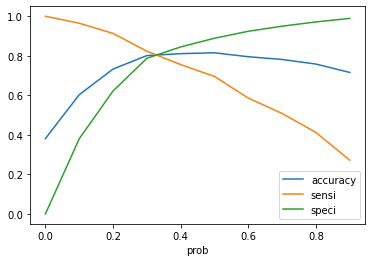

In [1402]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.32 is the optimum point to take it as a cutoff probability.

In [1403]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.32 else 0)

Y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0.0,0.228166,1871,0,1,1,1,0,0,0,0,0,0,0,0
6795,0.0,0.202848,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0.0,0.266783,3516,0,1,1,1,0,0,0,0,0,0,0,0
8105,0.0,0.855098,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0.0,0.095428,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [1404]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.8011750154607298

In [1405]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
confusion2

array([[3185,  817],
       [ 469, 1997]], dtype=int64)

In [1406]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1407]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8098134630981346


In [1408]:
#As we see that after changing the threshold, Sensitivity increase and is close to 81%.

In [1409]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.7958520739630185


# Precision and Recall

##### Precision
TP / TP + FP

In [1410]:
precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
precision

0.7096659559346127

##### Recall
TP / TP + FN

In [1411]:
recall = confusion2[1,1]/float(confusion2[1,0]+confusion2[1,1])
recall

0.8098134630981346

In [1412]:
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.7564393939393941

Using sklearn utilities for the same

In [1413]:
from sklearn.metrics import precision_score, recall_score

In [1414]:
precision_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.7939814814814815

In [1415]:
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted)

0.6954582319545823

# Precision and recall tradeoff

In [1416]:
from sklearn.metrics import precision_recall_curve

In [1417]:
Y_train_pred_final.Converted, Y_train_pred_final.predicted

(1871    0.0
 6795    0.0
 3516    0.0
 8105    0.0
 3934    0.0
        ... 
 350     1.0
 79      1.0
 8039    1.0
 6936    0.0
 5640    0.0
 Name: Converted, Length: 6468, dtype: float64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     0
 79      1
 8039    0
 6936    0
 5640    0
 Name: predicted, Length: 6468, dtype: int64)

In [1418]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

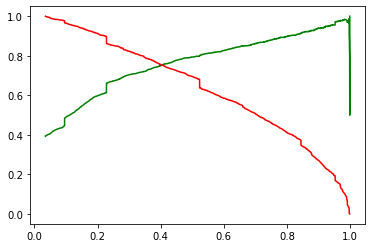

In [1419]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set


In [1420]:
##Scaling the test data

In [1421]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,What is your current occupation_Student,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0,1.672735,0.964504,2.117849,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,0,0,0.624595,-0.777416,1.553761,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
9199,0,0,-1.122305,-0.885371,-1.266675,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,0,-1.122305,-0.885371,-1.266675,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1422]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Working Professional,Last Notable Activity_Modified
4269,0,0.964504,0,0,0,0,0,0,1,0,0,0
2376,0,-0.885371,0,0,0,1,0,0,1,0,0,0
7766,0,-0.777416,1,0,0,0,0,0,0,0,1,0
9199,0,-0.885371,0,1,0,0,0,0,0,0,0,1
4359,0,-0.885371,0,0,0,1,0,0,0,0,0,0


In [1423]:
X_test_sm = sm.add_constant(X_test)

In [1424]:
Y_test_pred = res.predict(X_test_sm)

In [1425]:
Y_test_pred[:10]

4269    0.724998
2376    0.952672
7766    0.725138
9199    0.095428
4359    0.844341
9186    0.637444
1631    0.509673
8963    0.194503
8007    0.090917
5324    0.420350
dtype: float64

In [1426]:
# Converting Y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [1427]:
# Let's see the head
Y_pred_1.head()

,0
4269,0.724998
2376,0.952672
7766,0.725138
9199,0.095428
4359,0.844341


In [1428]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [1429]:
# Putting CustID to index
Y_test_df['Prospect ID'] = Y_test_df.index

In [1430]:
# Removing index for both dataframes to append them side by side 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [1431]:
# Appending Y_test_df and Y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

Y_pred_final.head()

,Converted,Prospect ID,0
0,1.0,4269,0.724998
1,1.0,2376,0.952672
2,1.0,7766,0.725138
3,0.0,9199,0.095428
4,1.0,4359,0.844341


In [1432]:

# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1433]:

# Rearranging the columns
Y_pred_final = Y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of Y_pred_final
Y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1.0,0.724998
1,2376,1.0,0.952672
2,7766,1.0,0.725138
3,9199,0.0,0.095428
4,4359,1.0,0.844341


In [1434]:

Y_pred_final['final_predicted'] = Y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.32 else 0)

Y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1.0,0.724998,1
1,2376,1.0,0.952672,1
2,7766,1.0,0.725138,1
3,9199,0.0,0.095428,0
4,4359,1.0,0.844341,1


In [1435]:

# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.8084415584415584

In [1436]:

confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted )
confusion2

array([[1347,  330],
       [ 201,  894]], dtype=int64)

In [1437]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1438]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8164383561643835

In [1439]:

# Let us calculate specificity
TN / float(TN+FP)

0.8032200357781754

In [1440]:
#As all the three Accuracy , Sensitivity and specificity is at above 80% 

# Assigning Lead Score to the Testing data

In [1441]:
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [1442]:
Y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1.0,0.724998,1,72
1,2376,1.0,0.952672,1,95
2,7766,1.0,0.725138,1,73
3,9199,0.0,0.095428,0,10
4,4359,1.0,0.844341,1,84


Find out the Hot leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85, they can be termed as 'Hot Leads'.

In [1443]:
hot_leads = Y_pred_final[Y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
1,2376,1.0,0.952672,1,95
12,2935,1.0,0.848887,1,85
13,2907,1.0,0.897386,1,90
25,1557,1.0,0.858702,1,86
33,8429,1.0,0.991374,1,99
...,...,...,...,...,...
2726,8761,1.0,0.849361,1,85
2733,5362,1.0,0.902328,1,90
2734,5741,1.0,0.892034,1,89
2740,6944,1.0,0.991418,1,99


So there are 375 leads which can be contacted and have a high chance of getting converted. 
The Prospect ID of the customers to be contacted are :

In [1444]:
hot_leads_prospectid = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_prospectid

array([2376, 2935, 2907, 1557, 8429, 1200, 5638, 7631, 6666, 5448, 1287,
       8103, 3444, 2392, 5363, 8499, 4830, 3192, 1365, 6687, 5793, 8099,
       4868, 8120, 2844, 4896, 7396,   88, 7683, 6860, 4058, 5042, 5896,
        269, 5666, 8113, 4645, 2481, 7159, 1965, 3845, 2946, 4869, 7627,
        954, 4902, 5818, 2804, 7157,  446, 3725, 4786, 8348, 1026,   76,
       5825, 8055, 2266, 2926, 2524, 7503, 1467, 5697, 6725, 6156, 2055,
       2549, 2653, 3478, 5687, 5832, 3190,   77, 9026, 6243, 4038, 7187,
       5812, 4646, 7033, 3188, 7716, 8556, 3228, 3500, 7818, 1675, 4483,
       3321, 7053, 1350, 8576, 7877, 7334, 6375, 7222, 5586, 7482, 6383,
       1425, 8904, 3172, 2158, 3919, 5784, 3455, 5942, 6046,  472,  833,
       4612, 9087, 3456, 2688, 2914, 5263, 4613, 8098, 2662, 4281, 2337,
       6010, 7636,  507, 2631, 7448, 2578, 8920, 8412, 3339, 8054, 8082,
       3113, 4607, 7756, 8087, 3488, 8888, 6170, 2764, 6760, 3120, 7963,
       5671, 8901, 7570, 8110, 4213, 4803, 5571, 86

In [1445]:
#Final feature list in the order of their importance
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.755821
Lead Source_Reference                                   4.013678
What is your current occupation_Working Professional    2.800606
Last Activity_Others                                    2.087658
Last Activity_SMS Sent                                  1.311285
Lead Source_Olark Chat                                  1.104093
Total Time Spent on Website                             1.070826
Lead Source_Others                                      1.065122
Lead Source_Google                                      0.376675
Specialization_Hospitality Management                  -0.864347
Last Notable Activity_Modified                         -1.030388
Do Not Email                                           -1.065131
const                                                  -1.374712
dtype: float64